<a href="https://colab.research.google.com/github/fulllz/DSProjects/blob/main/Project%203%20Sales%20Analysis%20and%20Time%20Series%20Forecasting%20with%20Superstore%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: Sales Analysis and Time Series Forecasting with Superstore Data

The data-driven decision can help the sales team to optimize the sales process and  improve the sales effectiveness. Marketing and sales analysis provide insights about the sale revenues, sale profits, products and customers. Regular sales data analysis enable us to understand the top performing and underperforming services, market opportunities and the problems in selling, lead conversions and drop offs.  
Time-series analysis belongs to a branch of statistics that involves the study of ordered, often temporal data. When relevantly applied, time-series analysis can reveal unexpected trends, extract helpful statistics, and even forecast trends ahead into the future. For these reasons, it is applied across many fields including stock market, weather forecasting and capacity planning. There are many time-series analysis we can explore such as forecast with uncertainty bounds, change point and anomaly detection. Some common techniques are used for time-series analysis and walk through the iterative steps required to manipulate, visualize time-series data in the project.

Here’s what we need to integrate it into the sales operations by sales data analytics:      
- Make data-driven decisions instead of relying on gut instinct.
- Find the most profitable customers.
- Get awareness on the market trends.
- Serve the customers better.
- Expand the market reach. 

Data source from kaggle, that is a 4 years superstore dataset with excel format: US_Superstore_data2014-2018.xls. 

### Outlines:

**1: Check of Data Quality**  
**2: Exploratory of Variables**  
**3: Sales Analysis**  
**4: Time Series Forecasting with ARIMA**  
**5: Time Series Modeling with Prophet**  

## 1:Check of Data Quality

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import itertools
from fbprophet import Prophet

In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:
df = pd.read_excel('US_Superstore_data2014-2018.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

**Rename the columns**

In [ ]:
df.rename(columns= lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Delete three columns which are not so useful for the following analysis**

In [ ]:
df.drop(['Row_ID', 'Postal_Code', 'Country'], axis=1, inplace=True)

**Sorting the data with _Order_Date_**

In [ ]:
df.sort_values(by='Order_Date',inplace=True)
df.head(5).append(df.tail(5))

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
7980,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
5091,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
1296,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
906,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


**check duplicates**

In [ ]:
df[df.duplicated(keep=False)]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(9993, 18)

**Check missing values**

In [ ]:
df.isnull().sum()

Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
City             0
State            0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Summary statistics**

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## 2: Exploratory of Variables

**(1) Univariable-numerical data**

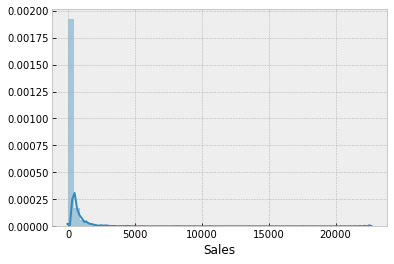

In [ ]:
ax = sns.distplot(df['Sales'])

In [ ]:
print('skew of sales: ', df['Sales'].skew())
print('kurtosis of sales: ', df['Sales'].kurt())

skew of sales:  12.97214155836326
kurtosis of sales:  305.28176970634985


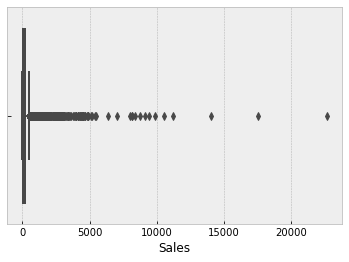

In [ ]:
ax = sns.boxplot(df['Sales'])

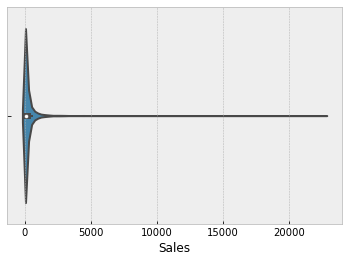

In [ ]:
ax = sns.violinplot(df['Sales'])

In [ ]:
df_Ssales = df[df['Sales'] < 500]['Sales']
df_Ssales

7980     16.448
739      11.784
740     272.736
741       3.540
1759     19.536
         ...   
5091      3.024
908      52.776
907      90.930
1296     13.904
906     323.136
Name: Sales, Length: 8831, dtype: float64

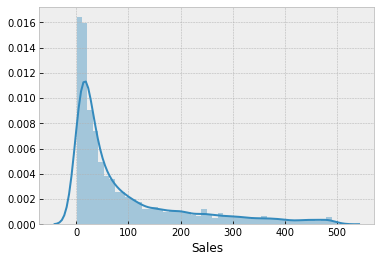

In [ ]:
ax = sns.distplot(df[df['Sales'] < 500]['Sales'])

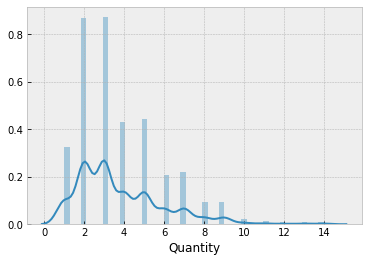

In [ ]:
ax = sns.distplot(df['Quantity'])

In [ ]:
df['Quantity'].nunique()

14

In [ ]:
df['Quantity'].unique()

array([ 2,  3,  9,  4,  1,  7,  6,  5, 10, 13,  8, 14, 12, 11],
      dtype=int64)

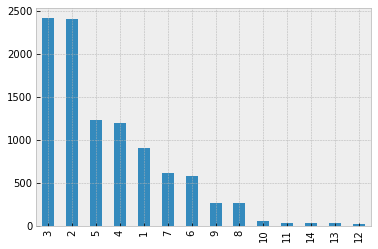

In [ ]:
ax = df['Quantity'].value_counts().plot(kind='bar')

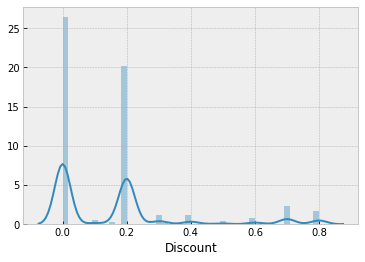

In [ ]:
ax = sns.distplot(df['Discount'])

In [ ]:
df['Discount'].nunique()

12

In [ ]:
df['Discount'].unique()

array([0.2 , 0.8 , 0.  , 0.6 , 0.7 , 0.15, 0.5 , 0.4 , 0.1 , 0.3 , 0.32,
       0.45])

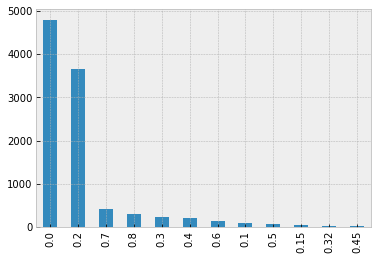

In [ ]:
ax = df['Discount'].value_counts().plot(kind='bar')

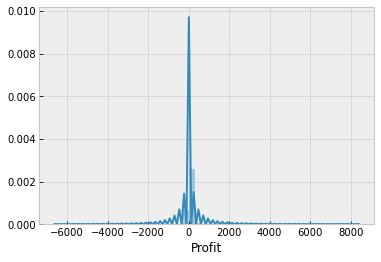

In [ ]:
ax = sns.distplot(df['Profit'])

**(2) Univariable-Categorical data**

In [ ]:
df['Ship_Mode'].nunique()

4

In [ ]:
df['Ship_Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

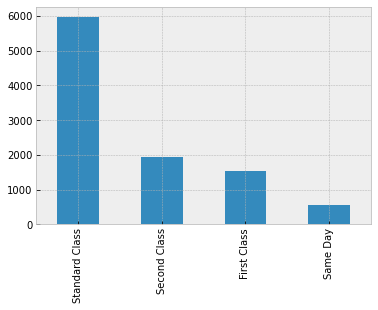

In [ ]:
ax = df['Ship_Mode'].value_counts().plot(kind='bar')

---------------------------------------------------------
unique number in segment:  3
segment categories:  ['Consumer' 'Home Office' 'Corporate']
---------------------------------------------------------


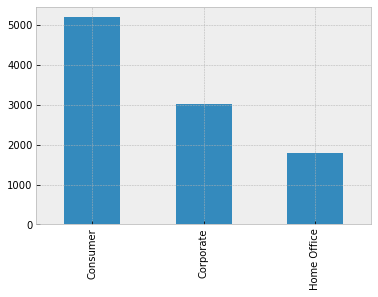

In [ ]:
print('---------------------------------------------------------')
print('unique number in segment: ', df['Segment'].nunique())
print('segment categories: ', df['Segment'].unique())
print('---------------------------------------------------------')
ax = df['Segment'].value_counts().plot(kind='bar')

---------------------------------------------------------
unique number in Region:  4
segment categories:  ['Central' 'East' 'South' 'West']
---------------------------------------------------------


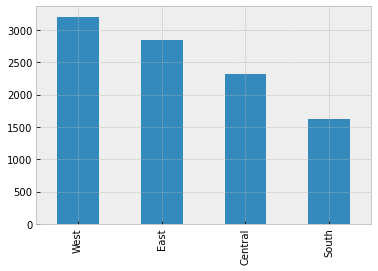

In [ ]:
print('---------------------------------------------------------')
print('unique number in Region: ', df['Region'].nunique())
print('segment categories: ', df['Region'].unique())
print('---------------------------------------------------------')
ax = df['Region'].value_counts().plot(kind='bar')

---------------------------------------------------------
unique number in Category:  3
Category categories:  ['Office Supplies' 'Furniture' 'Technology']
---------------------------------------------------------


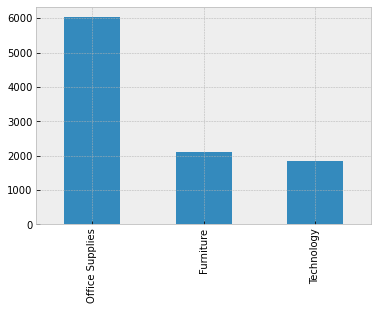

In [ ]:
print('---------------------------------------------------------')
print('unique number in Category: ', df['Category'].nunique())
print('Category categories: ', df['Category'].unique())
print('---------------------------------------------------------')
ax = df['Category'].value_counts().plot(kind='bar')

---------------------------------------------------------
unique number in Sub_Category:  17
Sub_Category categories:  ['Paper' 'Labels' 'Storage' 'Binders' 'Art' 'Chairs' 'Phones' 'Fasteners'
 'Furnishings' 'Accessories' 'Envelopes' 'Bookcases' 'Appliances' 'Tables'
 'Supplies' 'Machines' 'Copiers']
---------------------------------------------------------


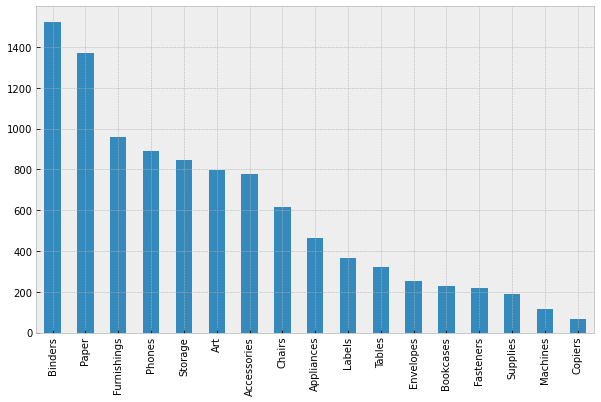

In [ ]:
print('---------------------------------------------------------')
print('unique number in Sub_Category: ', df['Sub_Category'].nunique())
print('Sub_Category categories: ', df['Sub_Category'].unique())
print('---------------------------------------------------------')
ax = df['Sub_Category'].value_counts().plot(kind='bar', figsize=(10, 6))


---------------------------------------------------------
unique number in  State:  49
State categories:  ['Texas' 'Illinois' 'Pennsylvania' 'Kentucky' 'Georgia' 'California'
 'Virginia' 'Delaware' 'Louisiana' 'Ohio' 'South Carolina' 'Oregon'
 'Arizona' 'Michigan' 'Tennessee' 'Arkansas' 'Florida' 'Indiana' 'Nevada'
 'South Dakota' 'New York' 'Wisconsin' 'Washington' 'New Jersey'
 'Missouri' 'North Carolina' 'Colorado' 'Utah' 'Mississippi' 'Minnesota'
 'Iowa' 'New Mexico' 'Massachusetts' 'Alabama' 'Montana' 'Idaho'
 'Maryland' 'Connecticut' 'New Hampshire' 'Oklahoma' 'Nebraska' 'Maine'
 'Kansas' 'Rhode Island' 'District of Columbia' 'Vermont' 'Wyoming'
 'North Dakota' 'West Virginia']
---------------------------------------------------------


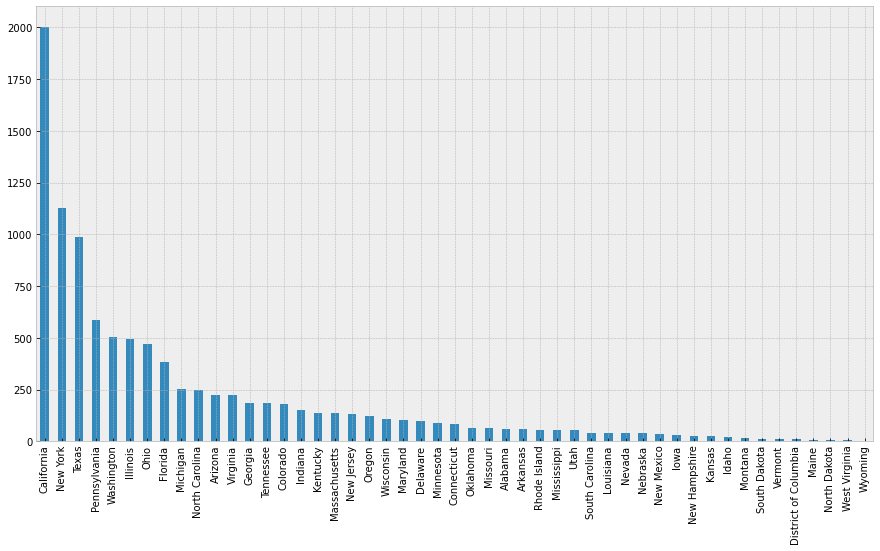

In [ ]:
print('---------------------------------------------------------')
print('unique number in  State: ', df['State'].nunique())
print('State categories: ', df['State'].unique())
print('---------------------------------------------------------')
ax = df['State'].value_counts().plot(kind='bar', figsize=(15, 8))

**(3) Numerical Multivariables-Correlation**

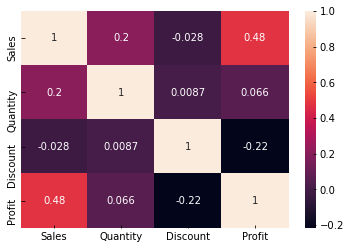

In [ ]:
data=df[['Sales','Quantity','Discount','Profit']]
sns.heatmap(data.corr(),annot=True)

Here we can observe that there is a positive correlation between Profit and sales
i.e when sales increases profit increases.

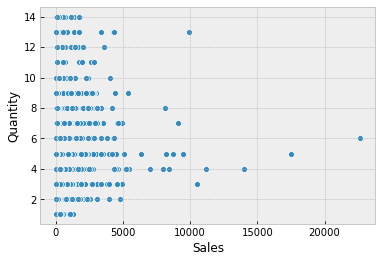

In [ ]:
ax = sns.scatterplot("Sales",'Quantity', data=df)

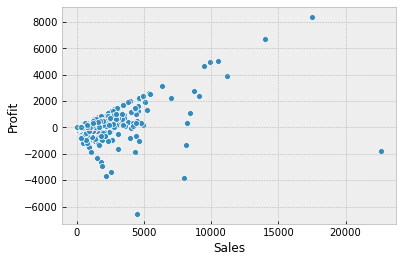

In [ ]:
ax = sns.scatterplot("Sales",'Profit',data=df)

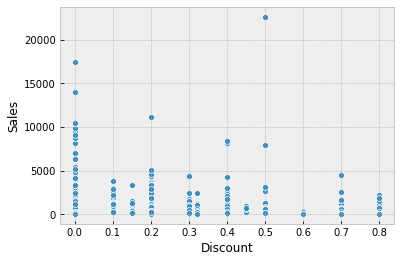

In [ ]:
ax = sns.scatterplot("Discount",'Sales',data=df)

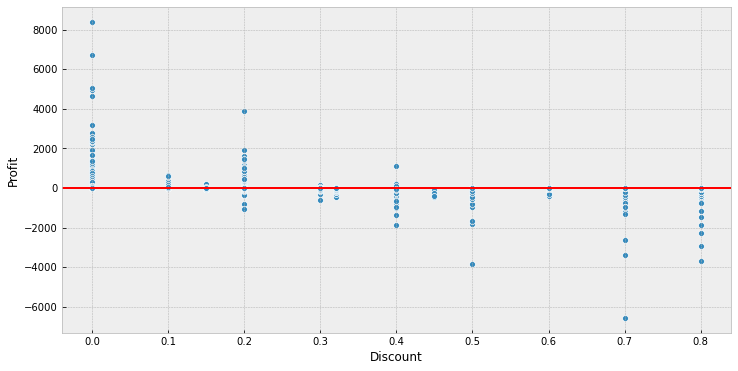

In [ ]:
fig, axes=plt.subplots(0,1,figsize=(12,6))
ax = sns.scatterplot("Discount",'Profit',data=df)
ax.axhline(y=0, c='red')

**(4) Categorical Multivariables**

In [ ]:
pd.crosstab(df['Segment'],df['Category'])

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,1113,3127,951
Corporate,646,1820,554
Home Office,361,1079,342


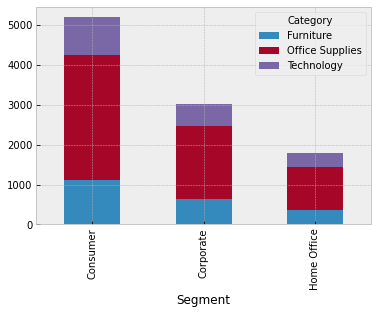

In [ ]:
pd.crosstab(df['Segment'],df['Category']).plot(kind="bar",stacked=True)

In [ ]:
pd.crosstab(df['Region'], df['Ship_Mode'])

Ship_Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,299,120,465,1439
East,490,155,530,1672
South,234,83,329,974
West,515,185,621,1882


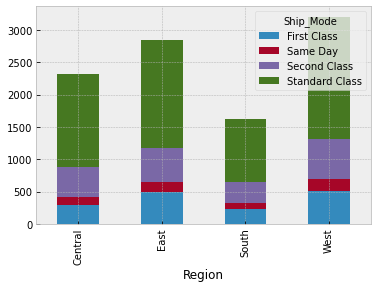

In [ ]:
pd.crosstab(df['Region'], df['Ship_Mode']).plot(kind="bar",stacked=True)

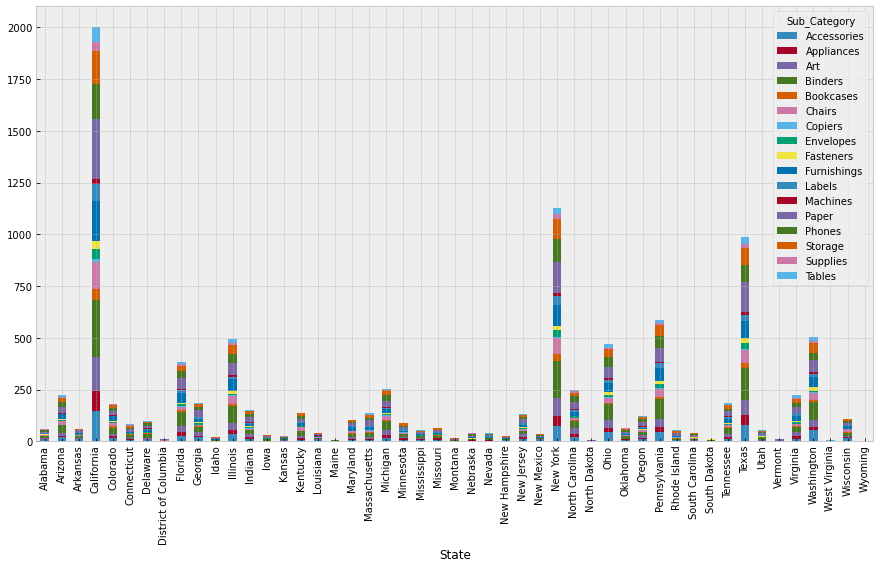

In [ ]:
pd.crosstab(df['State'], df['Sub_Category']).plot(kind='bar', stacked=True, figsize=(15,8))

**(5) Categorical-Numerical Multivariables**

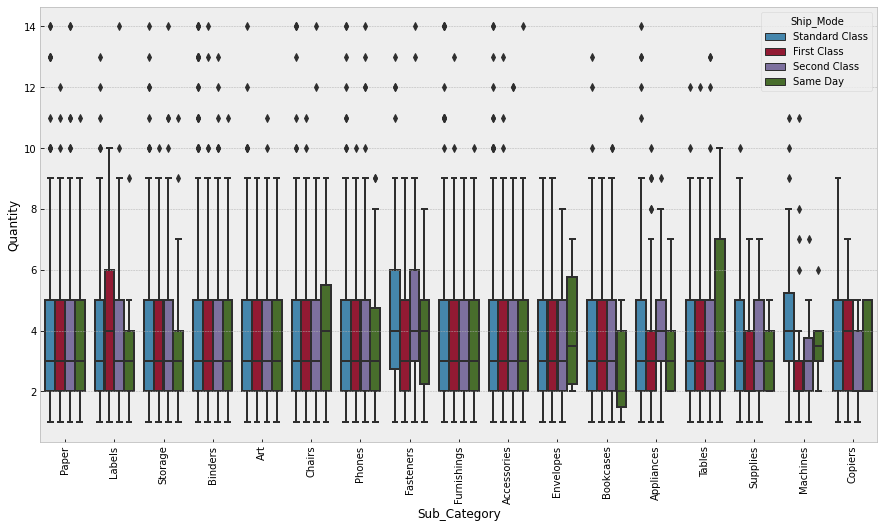

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x='Sub_Category', y='Quantity', hue='Ship_Mode', data=df)
plt.setp(ax.get_xticklabels(), rotation=90);

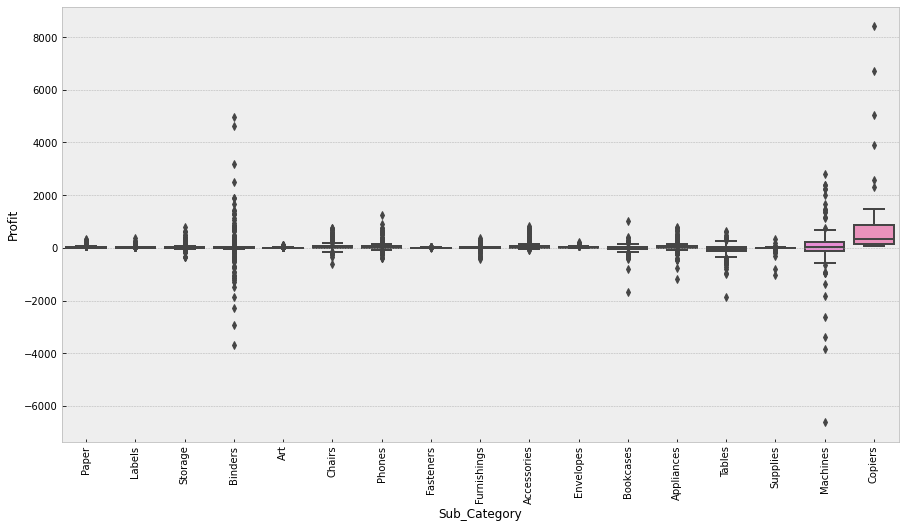

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x='Sub_Category', y='Profit', data=df)
plt.setp(ax.get_xticklabels(), rotation=90);

## 3: Sales Analysis

In [ ]:
df1 = df.set_index('Order_Date')
df1.head()

,Order_ID,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
Order_Date,,,,,,,,,,,,,,,,,
2014-01-03,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


**Trend and comparison of Sales, Quanity and Profit**

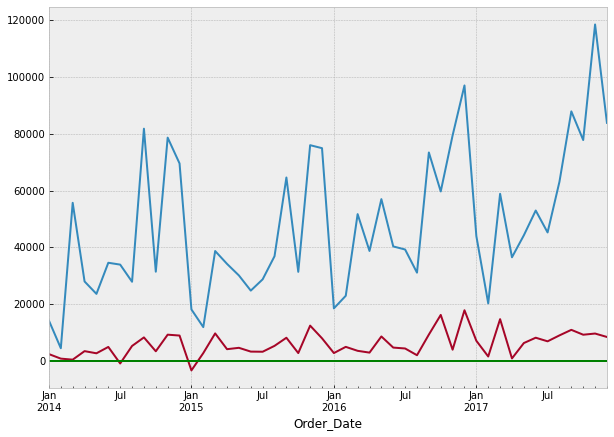

In [ ]:
df1['Sales'].resample('MS').sum().plot(figsize=(10,7))
ax = df1['Profit'].resample('MS').sum().plot(figsize=(10,7))
ax.axhline(y=0, c='green')

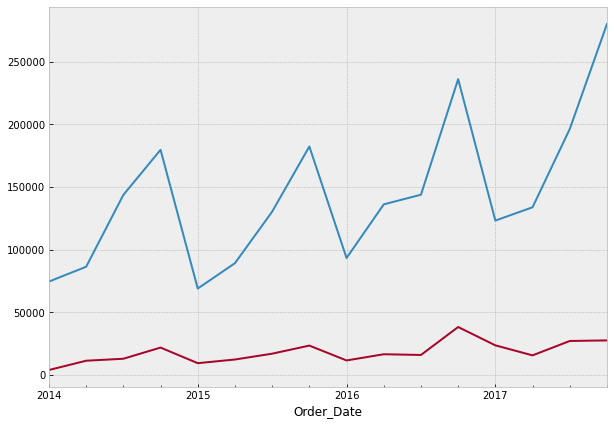

In [ ]:
df1['Sales'].resample('Q').sum().plot(figsize=(10,7))
df1['Profit'].resample('Q').sum().plot(figsize=(10,7))

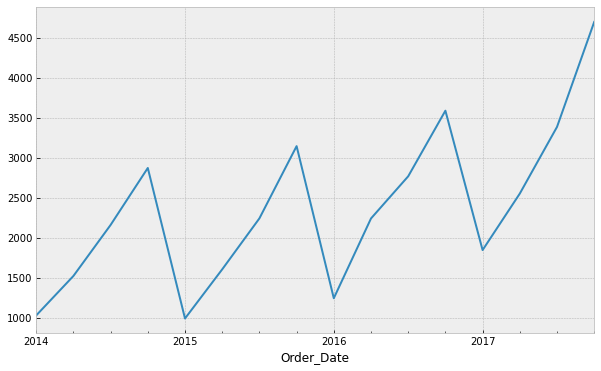

In [ ]:
df1['Quantity'].resample('Q').sum().plot(figsize=(10,6))

In [ ]:
df['Year'] = df['Order_Date'].dt.year

In [ ]:
df['Month'] = df['Order_Date'].dt.month

In [ ]:
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year,Month
7980,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2014,1
739,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2014,1
740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2014,1
741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2014,1
1759,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2014,1


In [ ]:
df_sales = df[['Order_Date', 'Sales', 'Quantity', 'Profit', 'Year', 'Month']]
df_sales.sample(10)

,Order_Date,Sales,Quantity,Profit,Year,Month
4307,2016-06-28,33.568,2,11.7488,2016,6
7119,2017-11-17,13.904,2,4.5188,2017,11
8727,2015-12-27,53.352,3,16.0056,2015,12
6818,2017-12-28,1.680,5,-2.6880,2017,12
9811,2016-11-27,25.920,4,12.4416,2016,11
1627,2015-09-24,517.500,6,155.2500,2015,9
7889,2016-12-25,19.890,9,5.3703,2016,12
558,2016-06-10,32.400,5,15.5520,2016,6
5280,2017-10-07,85.520,2,22.2352,2017,10
410,2017-12-08,28.350,9,13.6080,2017,12


In [ ]:
sales_year = df_sales.groupby(['Year', 'Month']).sum()
sales_year.sample(10)

Sales  Quantity      Profit
Year Month                                  
2015 6      24797.2920       486   3335.5572
     3      38726.2520       515   9732.0978
2017 10     77776.9232      1133   9275.2755
2016 5      56987.7280       863   8662.1464
2014 1      14236.8950       284   2450.1907
     3      55691.0090       585    498.7299
2015 5      30131.6865       575   4667.8690
2014 10     31453.3930       573   3448.2573
     5      23648.2870       466   2738.7096
2017 9      87866.6520      1660  10991.5556

In [ ]:
sales_year['profit_rate'] = sales_year['Profit']/sales_year['Sales']
sales_year.sample(10)

Sales  Quantity      Profit  profit_rate
Year Month                                               
2015 4      34195.2085       543   4187.4962     0.122459
2016 7      39261.9630       758   4432.8779     0.112905
2017 10     77776.9232      1133   9275.2755     0.119255
2014 10     31453.3930       573   3448.2573     0.109631
2017 5      44261.1102       887   6342.5828     0.143299
     3      58872.3528       885  14751.8915     0.250574
     12     83829.3188      1723   8483.3468     0.101198
2015 11     75972.5635      1310  12474.7884     0.164201
2017 4      36521.5361       733    933.2900     0.025555
2014 8      27909.4685       609   5318.1050     0.190548

In [ ]:
sales_year.describe()

,Sales,Quantity,Profit,profit_rate
count,48.000000,48.000000,48.000000,48.000000
mean,47852.489340,788.979167,5966.855844,0.124733
std,25200.571240,401.923910,4288.551201,0.074084
min,4519.892000,159.000000,-3281.007000,-0.180532
25%,29790.096125,540.750000,2939.567000,0.101678
50%,39803.248500,664.000000,4990.551950,0.126085
75%,65833.343625,1019.750000,8742.502275,0.154989
max,118447.825000,1840.000000,17885.309300,0.272135


In [ ]:
year_2016 = sales_year.loc[slice(2016), :].reset_index()
year_2016

,Year,Month,Sales,Quantity,Profit,profit_rate
0,2014,1,14236.8950,284,2450.1907,0.172101
1,2014,2,4519.8920,159,862.3084,0.190781
2,2014,3,55691.0090,585,498.7299,0.008955
3,2014,4,28013.9730,534,3500.8940,0.124970
4,2014,5,23648.2870,466,2738.7096,0.115810
5,2014,6,34595.1276,521,4976.5244,0.143850
6,2014,7,33946.3930,550,-841.4826,-0.024789
7,2014,8,27909.4685,609,5318.1050,0.190548
8,2014,9,81777.3508,1000,8328.0994,0.101839
9,2014,10,31453.3930,573,3448.2573,0.109631


In [ ]:
idx = pd.IndexSlice

In [ ]:
year_2016 = sales_year.loc[idx[2016,1:6],:].reset_index()
year_2016

,Year,Month,Sales,Quantity,Profit,profit_rate
0,2016,1,18542.491,358,2824.8233,0.152343
1,2016,2,22978.815,306,5004.5795,0.217791
2,2016,3,51715.875,579,3611.9680,0.069843
3,2016,4,38750.039,635,2977.8149,0.076847
4,2016,5,56987.728,863,8662.1464,0.152000
5,2016,6,40344.534,742,4750.3781,0.117745


In [ ]:
df_sales.Year.unique()

array([2014, 2015, 2016, 2017], dtype=int64)

In [ ]:
year_2014 = sales_year.loc[slice(2014,2014)].reset_index()
year_2015 = sales_year.loc[slice(2015,2015)].reset_index()
year_2016 = sales_year.loc[slice(2016,2016)].reset_index()
year_2017 = sales_year.loc[slice(2017,2017)].reset_index()
year_2014

,Year,Month,Sales,Quantity,Profit,profit_rate
0,2014,1,14236.8950,284,2450.1907,0.172101
1,2014,2,4519.8920,159,862.3084,0.190781
2,2014,3,55691.0090,585,498.7299,0.008955
3,2014,4,28013.9730,534,3500.8940,0.124970
4,2014,5,23648.2870,466,2738.7096,0.115810
5,2014,6,34595.1276,521,4976.5244,0.143850
6,2014,7,33946.3930,550,-841.4826,-0.024789
7,2014,8,27909.4685,609,5318.1050,0.190548
8,2014,9,81777.3508,1000,8328.0994,0.101839
9,2014,10,31453.3930,573,3448.2573,0.109631


In [ ]:
year_2016['Sales']

0     18542.4910
1     22978.8150
2     51715.8750
3     38750.0390
4     56987.7280
5     40344.5340
6     39261.9630
7     31115.3743
8     73410.0249
9     59687.7450
10    79411.9658
11    96999.0430
Name: Sales, dtype: float64

In [ ]:
sales=pd.concat([year_2014['Sales'],year_2015['Sales'],
                 year_2016['Sales'],year_2017['Sales']],axis=1)

In [ ]:
sales.columns = ['Sales-2014','Sales-2015','Sales-2016','Sales-2017']
sales.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# The color is deeper, the sale's ammount is higher.
sales.style.background_gradient(cmap='Oranges')

,Sales-2014,Sales-2015,Sales-2016,Sales-2017
Jan,14236.895000,18174.075600,18542.491000,43971.374000
Feb,4519.892000,11951.411000,22978.815000,20301.133400
Mar,55691.009000,38726.252000,51715.875000,58872.352800
Apr,28013.973000,34195.208500,38750.039000,36521.536100
May,23648.287000,30131.686500,56987.728000,44261.110200
Jun,34595.127600,24797.292000,40344.534000,52981.725700
Jul,33946.393000,28765.325000,39261.963000,45264.416000
Aug,27909.468500,36898.332200,31115.374300,63120.888000
Sep,81777.350800,64595.918000,73410.024900,87866.652000
Oct,31453.393000,31404.923500,59687.745000,77776.923200


              sales_sum  rise_rate
Sales-2014  483966.1261   0.000000
Sales-2015  470532.5090  -0.027757
Sales-2016  609205.5980   0.294715
Sales-2017  733215.2552   0.203560


<Figure size 720x576 with 0 Axes>

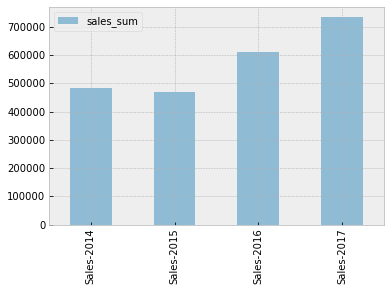

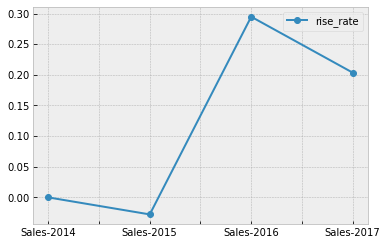

In [ ]:
sales_sum=sales.sum()

# calculate annual increasing rate
rise_15=sales_sum[1]/sales_sum[0]-1
rise_16=sales_sum[2]/sales_sum[1]-1
rise_17=sales_sum[3]/sales_sum[2]-1
rise_rate=[0,rise_15,rise_16,rise_17]
# show the results
sales_sum=pd.DataFrame({'sales_sum':sales_sum})
sales_sum['rise_rate']=rise_rate
print(sales_sum)
plt.figure(figsize=(10,8))
sales_sum.plot(y='sales_sum', kind='bar', alpha=0.5)
sales_sum.plot(y='rise_rate', kind='line', marker='o')
plt.show()

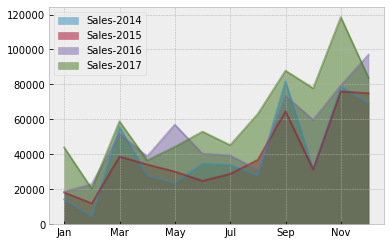

In [ ]:
sales.plot.area(stacked=False)

In [ ]:
sales_year.sample(10)

Sales  Quantity      Profit  profit_rate
Year Month                                               
2017 9      87866.6520      1660  10991.5556     0.125094
2014 2       4519.8920       159    862.3084     0.190781
     1      14236.8950       284   2450.1907     0.172101
2015 12     74919.5212      1203   8016.9659     0.107008
2014 12     69545.6205      1079   8983.5699     0.129175
2015 11     75972.5635      1310  12474.7884     0.164201
2017 10     77776.9232      1133   9275.2755     0.119255
2016 2      22978.8150       306   5004.5795     0.217791
2017 2      20301.1334       363   1613.8720     0.079497
2016 10     59687.7450       767  16243.1425     0.272135

In [ ]:
quantity = pd.concat([year_2014['Quantity'], year_2015['Quantity'], year_2016['Quantity'], year_2017['Quantity']],
                     axis=1)
quantity.columns = ['Quantity_2014', 'Quantity_2015', 'Quantity_2016','Quantity_2017']
quantity.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
quantity.style.background_gradient()

,Quantity_2014,Quantity_2015,Quantity_2016,Quantity_2017
Jan,284,236,358,597
Feb,159,239,306,363
Mar,585,515,579,885
Apr,534,543,635,733
May,466,575,863,887
Jun,521,486,742,931
Jul,550,557,758,840
Aug,609,598,693,884
Sep,1000,1086,1316,1660
Oct,573,631,767,1133


               quantity_sum  rise_rate
Quantity_2014          7579   0.000000
Quantity_2015          7979   0.052777
Quantity_2016          9837   0.232861
Quantity_2017         12476   0.268273


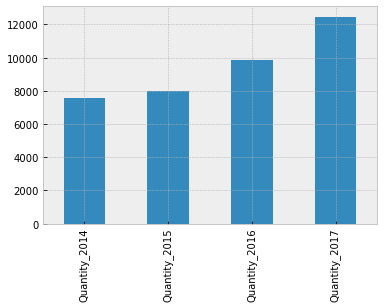

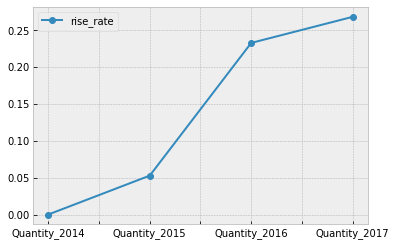

In [ ]:
quantity_sum = quantity.sum()
# calculate annual increasing rate
rise_15=quantity_sum[1]/quantity_sum[0]-1
rise_16=quantity_sum[2]/quantity_sum[1]-1
rise_17=quantity_sum[3]/quantity_sum[2]-1
rise_rate1=[0,rise_15,rise_16,rise_17]
# show the results
quantity_sum=pd.DataFrame({'quantity_sum':quantity_sum})
quantity_sum['rise_rate']=rise_rate1
print(quantity_sum)

quantity_sum['quantity_sum'].plot(kind='bar')
quantity_sum.plot(y='rise_rate', kind='line', marker='o')

In [ ]:
profit = pd.concat([year_2014['Profit'], year_2015['Profit'], year_2016['Profit'], year_2017['Profit']], axis=1)
profit.columns = ['profit_2014', 'profit_2015', 'profit_2016', 'profit_2017']
profit.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
profit.style.background_gradient('Purples')

,profit_2014,profit_2015,profit_2016,profit_2017
Jan,2450.190700,-3281.007000,2824.823300,7140.439100
Feb,862.308400,2813.850800,5004.579500,1613.872000
Mar,498.729900,9732.097800,3611.968000,14751.891500
Apr,3500.894000,4187.496200,2977.814900,933.290000
May,2738.709600,4667.869000,8662.146400,6342.582800
Jun,4976.524400,3335.557200,4750.378100,8223.335700
Jul,-841.482600,3288.648300,4432.877900,6952.621200
Aug,5318.105000,5355.808400,2062.069300,9040.955700
Sep,8328.099400,8209.162700,9328.657600,10991.555600
Oct,3448.257300,2817.366000,16243.142500,9275.275500


             profit_sum  rise_rate
profit_2014  49556.0329   0.000000
profit_2015  61618.6037   0.243413
profit_2016  81795.1743   0.327443
profit_2017  93439.2696   0.142357


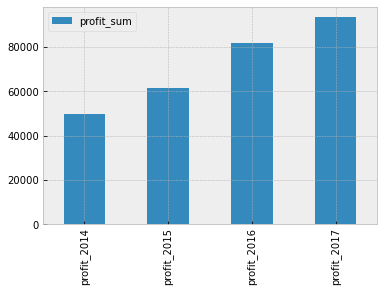

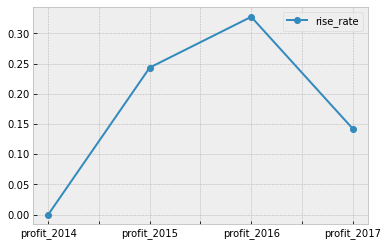

In [ ]:
profit_sum = profit.sum()
rise_45 = profit_sum[1]/profit_sum[0] - 1
rise_56 = profit_sum[2]/profit_sum[1] - 1
rise_67 = profit_sum[3]/profit_sum[2] - 1
rise_rate2 = [0, rise_45, rise_56, rise_67]
profit_sum = pd.DataFrame({'profit_sum':profit_sum})
profit_sum['rise_rate'] = rise_rate2
print(profit_sum)

profit_sum.plot(y = 'profit_sum', kind = 'bar')
profit_sum.plot(y = 'rise_rate', kind = 'line', marker='o')

In [ ]:
for i in range(2014, 2017):
    data = df[df['Year'] == i]
    price = data[['Order_Date', 'Customer_ID', 'Sales']]
    price_clean = price.drop_duplicates(subset=['Order_Date', 'Customer_ID'])
    total_num = price_clean.shape[0]
    print('{} total consuming times='.format(i), total_num)
    unit_price = price['Sales'].sum()/total_num
    print('{} per customer transaction='.format(i), unit_price,'\n')

2014 total consuming times= 968
2014 per customer transaction= 499.96500630165286 

2015 total consuming times= 1033
2015 per customer transaction= 455.500976766699 

2016 total consuming times= 1310
2016 per customer transaction= 465.042441221374 



**Comparison of different regions**

In [ ]:
df['Region'].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [ ]:
Market_Year_Sales = df.groupby(['Region', 'Year']).agg({'Sales':'sum'}).reset_index().rename(columns={'Sales':'Sales_amounts'})
Market_Year_Sales.head()                                                       

,Region,Year,Sales_amounts
0,Central,2014,103838.1646
1,Central,2015,102874.2220
2,Central,2016,147429.3760
3,Central,2017,147098.1282
4,East,2014,128399.0850


Text(0.5, 1.0, '2014-2017 market sales')

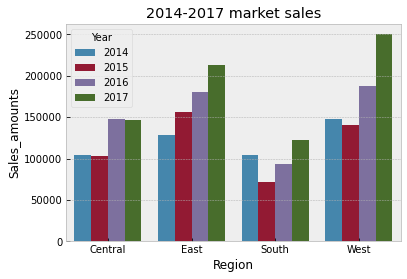

In [ ]:
sns.barplot(x='Region', y='Sales_amounts', hue='Year', data=Market_Year_Sales)
plt.title('2014-2017 market sales')

In [ ]:
Region_Sales = df.groupby(['Region']).agg({'Sales':'sum'})
Region_Sales["percent"] = Region_Sales["Sales"] / df["Sales"].sum()
Region_Sales.style.background_gradient('Oranges')

,Sales,percent
Region,,
Central,501239.890800,0.218223
East,678499.868000,0.295396
South,391721.905000,0.170542
West,725457.824500,0.315839


**Top selling products**

In [ ]:
productId_count = df.groupby('Product_ID').count()['Customer_ID'].sort_values(ascending=False)
print(productId_count.head(10))

Product_ID
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10001146    15
FUR-CH-10002647    15
TEC-AC-10003628    15
TEC-AC-10002049    15
OFF-BI-10002026    14
FUR-CH-10002880    14
OFF-PA-10002377    14
Name: Customer_ID, dtype: int64


In [ ]:
productId_amount = df.groupby('Product_ID').sum()['Sales'].sort_values(ascending=False)
print(productId_amount.head(10))

Product_ID
TEC-CO-10004722    61599.824
OFF-BI-10003527    27453.384
TEC-MA-10002412    22638.480
FUR-CH-10002024    21870.576
OFF-BI-10001359    19823.479
OFF-BI-10000545    19024.500
TEC-CO-10001449    18839.686
TEC-MA-10001127    18374.895
OFF-BI-10004995    17965.068
OFF-SU-10000151    17030.312
Name: Sales, dtype: float64


In [ ]:
productId_Profit= df.groupby('Product_ID').sum()['Profit'].sort_values(ascending=False)
print(productId_Profit.head(10))

Product_ID
TEC-CO-10004722    25199.9280
OFF-BI-10003527     7753.0390
TEC-CO-10001449     6983.8836
TEC-CO-10003763     4570.9347
TEC-AC-10002049     4425.3432
TEC-MA-10001127     4094.9766
TEC-MA-10003979     3772.9461
TEC-MA-10001047     3717.9714
OFF-BI-10001120     3345.2823
TEC-MA-10000045     3343.5360
Name: Profit, dtype: float64


**checking of products sector and sub-category**

In [ ]:
df['Category_Sub_Category'] = df[['Category','Sub_Category']].apply(lambda x:str(x[0])+'_'+str(x[1]),axis=1)
df_Category_Sub_Category=df.groupby("Category_Sub_Category").agg({"Profit":"sum","Sales":"sum"}).reset_index()

In [ ]:
df_Category_Sub_Category.sort_values(by=["Sales"],ascending=False, inplace=True)
df_Category_Sub_Category['cum_percent'] = df_Category_Sub_Category['Sales'].cumsum()/df_Category_Sub_Category['Sales'].sum()
df_Category_Sub_Category

,Category_Sub_Category,Profit,Sales,cum_percent
16,Technology_Phones,44515.7306,330007.0540,0.143674
1,Furniture_Chairs,26602.2251,328167.7310,0.286547
11,Office Supplies_Storage,21278.8264,223843.6080,0.384001
3,Furniture_Tables,-17725.4811,206965.5320,0.474106
6,Office Supplies_Binders,30221.7633,203412.7330,0.562665
15,Technology_Machines,3384.7569,189238.6310,0.645053
13,Technology_Accessories,41936.6357,167380.3180,0.717925
14,Technology_Copiers,55617.8249,149528.0300,0.783024
0,Furniture_Bookcases,-3472.5560,114879.9963,0.833039
4,Office Supplies_Appliances,18138.0054,107532.1610,0.879855


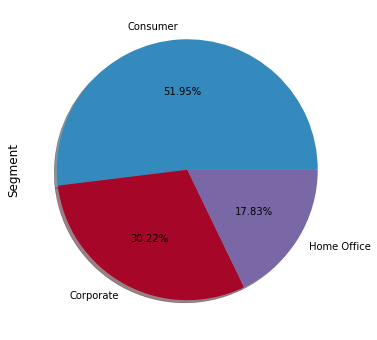

In [ ]:
df["Segment"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, figsize=(14, 6))

Text(0.5, 1.0, '2014-2017 Segment Customer')

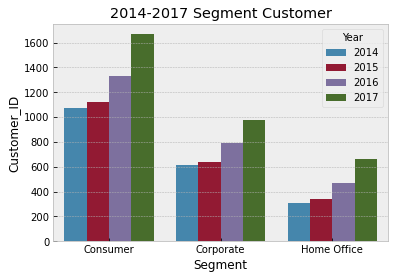

In [ ]:
Segment_Year = df.groupby(["Segment", 'Year']).agg({'Customer_ID':'count'}).reset_index()
sns.barplot(x='Segment', y='Customer_ID', hue='Year', data = Segment_Year)
plt.title('2014-2017 Segment Customer')

Text(0.5, 1.0, '2014-2017 Segment Sales')

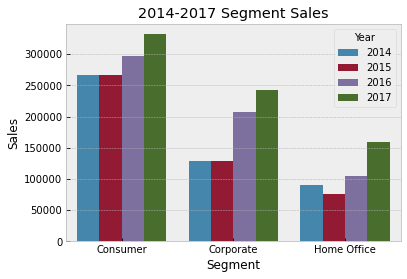

In [ ]:
Segment_sales = df.groupby(["Segment", 'Year']).agg({'Sales':'sum'}).reset_index()
sns.barplot(x='Segment', y='Sales', hue='Year', data = Segment_sales)
plt.title('2014-2017 Segment Sales')

**Customer and Order**

In [ ]:
grouped_Customer = df[['Customer_ID','Order_Date',
'Quantity', 'Sales', 'Month']].sort_values(['Order_Date']).groupby('Customer_ID')
grouped_Customer.head()

,Customer_ID,Order_Date,Quantity,Sales,Month
7980,DP-13000,2014-01-03,2,16.4480,1
739,PO-19195,2014-01-04,3,11.7840,1
740,PO-19195,2014-01-04,3,272.7360,1
741,PO-19195,2014-01-04,2,3.5400,1
1759,MB-18085,2014-01-05,3,19.5360,1
...,...,...,...,...,...
2727,SK-19990,2017-12-22,1,1.6410,12
6089,PC-18745,2017-12-28,2,1.1880,12
953,GH-14665,2017-12-28,2,27.1680,12
954,GH-14665,2017-12-28,2,78.8528,12


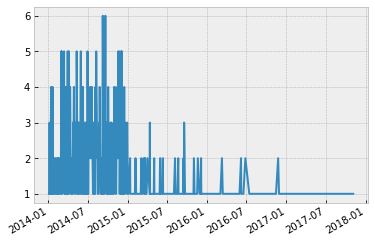

In [ ]:
grouped_Customer.min().Order_Date.value_counts().plot()

**How many orders made by the customers?**

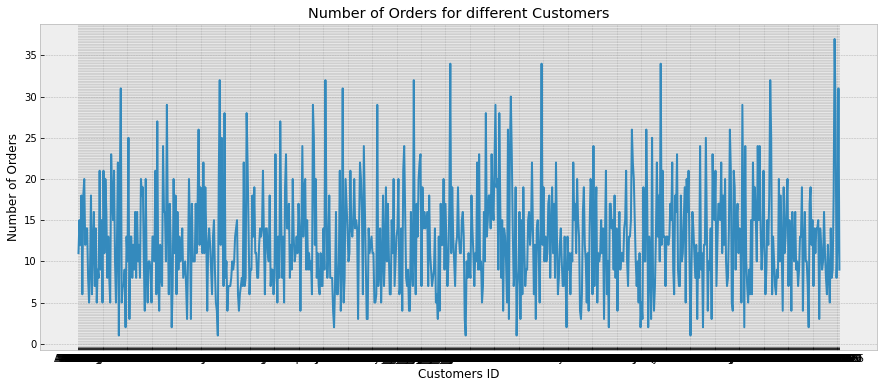

In [ ]:
orders = df.groupby(by=['Customer_ID'], as_index=False)['Order_ID'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.Customer_ID, orders.Order_ID)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

**TOP 10 most number of orders**

In [ ]:
print('The TOP 10 customers with most number of orders...')
orders.sort_values(by='Order_ID', ascending=False).head(10)

The TOP 10 customers with most number of orders...


,Customer_ID,Order_ID
787,WB-21850,37
606,PP-18955,34
387,JL-15835,34
482,MA-17560,34
720,SV-20365,32
349,JD-15895,32
147,CK-12205,32
257,EH-13765,32
275,EP-13915,31
791,ZC-21910,31


**How much money spent by the customers?**

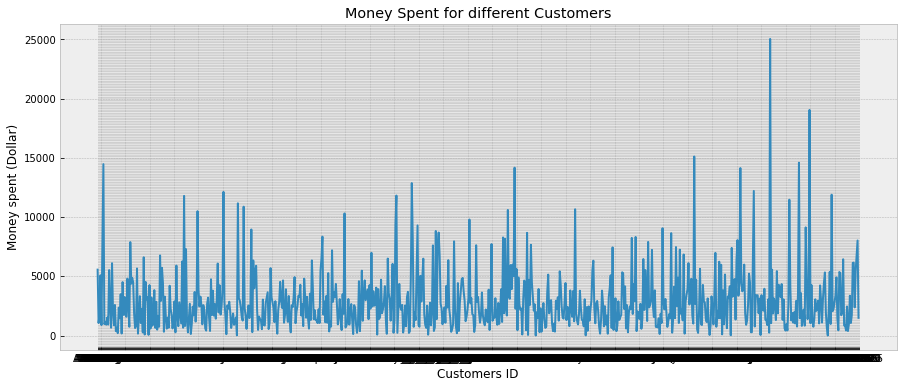

In [ ]:
money_spent = df.groupby(by='Customer_ID', as_index=False)['Sales'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.Customer_ID, money_spent.Sales)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

 **TOP 10 highest money spent**

In [ ]:
print('The TOP 10 customers with highest money spent...')
money_spent.sort_values(by='Sales', ascending=False).head(10)

The TOP 10 customers with highest money spent...


,Customer_ID,Sales
700,SM-20320,25043.050
741,TC-20980,19052.218
621,RB-19360,15117.339
730,TA-21385,14595.620
6,AB-10105,14473.571
434,KL-16645,14175.229
669,SC-20095,14142.334
327,HL-15040,12873.298
683,SE-20110,12209.438
131,CC-12370,12129.072


## 4: Time Series Forecasting with ARIMA

Before applying the model, what work we should do:

**Indexing with Time-series Data**  
When working with time-series data in Python we should ensure that dates are used as an index.

**Handling Missing Values in Time-series Data**  
Real world data tends be messy. It is common for time-series data to contain missing values but we don’t want have gaps in the data.

**Visualizing Time-series Data**  
When working with time-series data, a lot can be revealed through visualizing it and important things to look out for are:  
- seasonality: does the data display a clear periodic pattern?  
- trend: does the data follow a consistent upwards or downward slope?  
- noise: are there any outlier points or missing values that are not consistent with the rest of the data?  

In [ ]:
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year,Month,Category_Sub_Category
7980,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2014,1,Office Supplies_Paper
739,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2014,1,Office Supplies_Labels
740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2014,1,Office Supplies_Storage
741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2014,1,Office Supplies_Binders
1759,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2014,1,Office Supplies_Art


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 7980 to 906
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order_ID               9993 non-null   object        
 1   Order_Date             9993 non-null   datetime64[ns]
 2   Ship_Date              9993 non-null   datetime64[ns]
 3   Ship_Mode              9993 non-null   object        
 4   Customer_ID            9993 non-null   object        
 5   Customer_Name          9993 non-null   object        
 6   Segment                9993 non-null   object        
 7   City                   9993 non-null   object        
 8   State                  9993 non-null   object        
 9   Region                 9993 non-null   object        
 10  Product_ID             9993 non-null   object        
 11  Category               9993 non-null   object        
 12  Sub_Category           9993 non-null   object        
 13  P

In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']

In [ ]:
furniture.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Year,Month,Category_Sub_Category
7474,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,Henderson,Kentucky,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,2014,1,Furniture_Chairs
7660,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,Huntsville,Texas,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,2014,1,Furniture_Furnishings
866,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,Springfield,Virginia,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,2014,1,Furniture_Furnishings
716,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,Dover,Delaware,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,2014,1,Furniture_Furnishings
2978,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,Mount Pleasant,South Carolina,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,2014,1,Furniture_Chairs


In [ ]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Region', 'Product_ID',
       'Category', 'Sub_Category', 'Product_Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Year', 'Month', 'Category_Sub_Category'],
      dtype='object')

In [ ]:
furniture = furniture[['Order_Date', 'Sales']]
furniture = furniture.sort_values('Order_Date')

In [ ]:
# Indexing with time series data
furniture = furniture.set_index('Order_Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order_Date', length=2120, freq=None)

In [ ]:
furniture.head()

,Sales
Order_Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [ ]:
y = furniture['Sales'].resample('MS').mean()

In [ ]:
y

Order_Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    306.538600
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014438
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

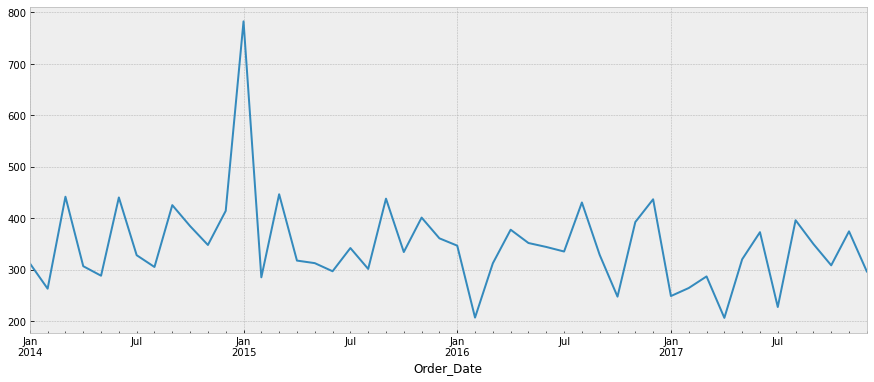

In [ ]:
# Visualizing furniture sales time series data
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [ ]:
x = furniture['Sales'].resample('Q').sum()

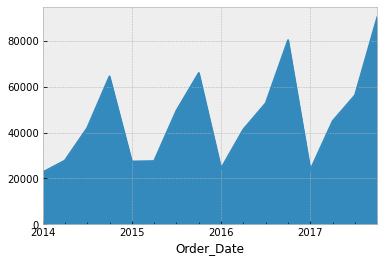

In [ ]:
x.plot(kind='area')

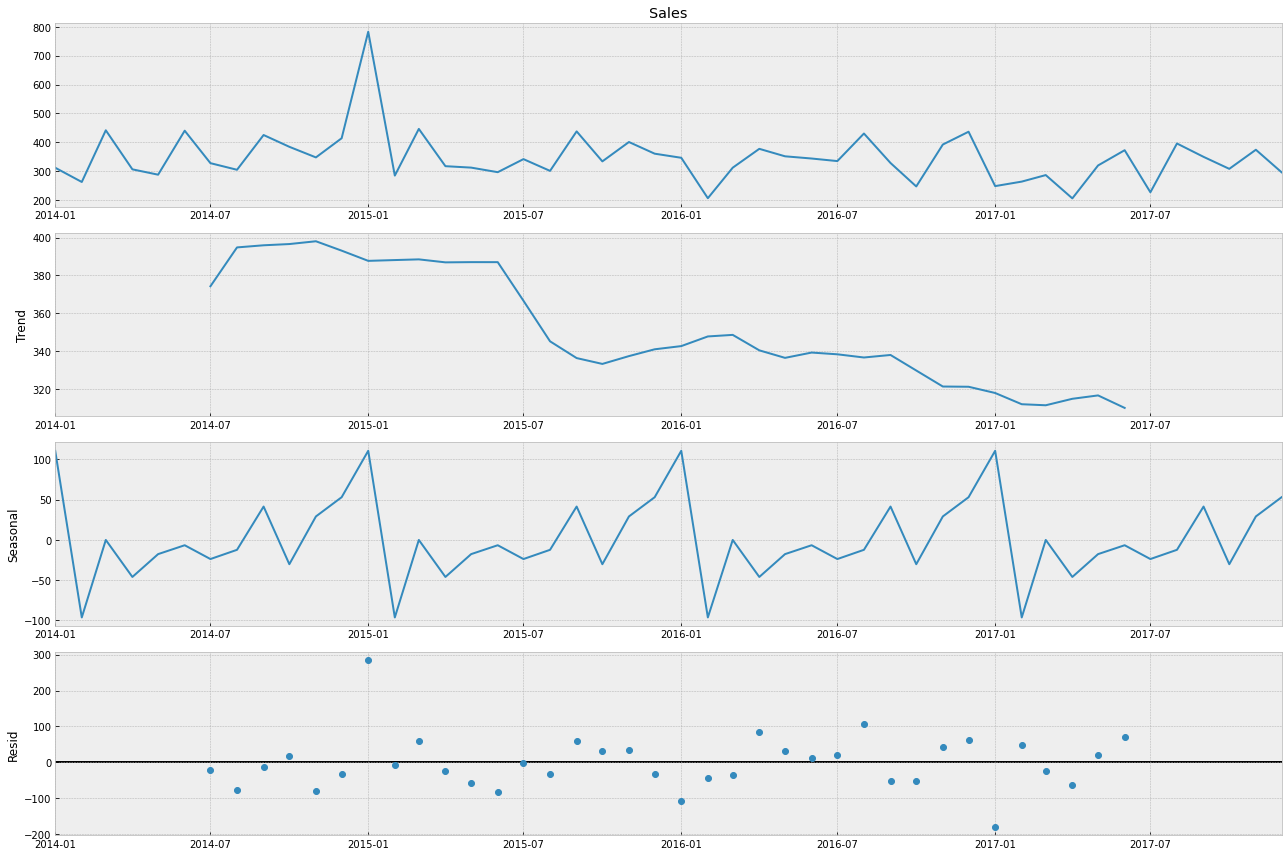

In [ ]:
rcParams['figure.figsize'] = 18, 12
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
ax = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

**The ARIMA Time Series Model**  

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:  

- p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.  
- d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.  
- q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.  

When dealing with seasonal effects, we make use of the seasonal ARIMA, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).  
We will use a “grid search” to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest.

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3158485243974
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1467.2364071166428
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.2025968088202
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:272.09198866194885
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8190421670668
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1401.3894636236244
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.44193403489186
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:274.09198646606194
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.125010353135
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2688.0749855219674
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.54866189566064
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:262.52312489879785
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.1659687608555
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2734.2656452410492
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.4418910005936
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:264.5230801081985
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6255413942511
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1513.5628712641847
A

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1896      0.314     -0.604      0.546      -0.804       0.425
ma.L1         -1.0000      0.439     -2.279      0.023      -1.860      -0.140
ma.S.L12      -0.0686      0.161     -0.427      0.669      -0.384       0.246
sigma2      6419.5913   6.84e-05   9.39e+07      0.000    6419.591    6419.591


The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we’ll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

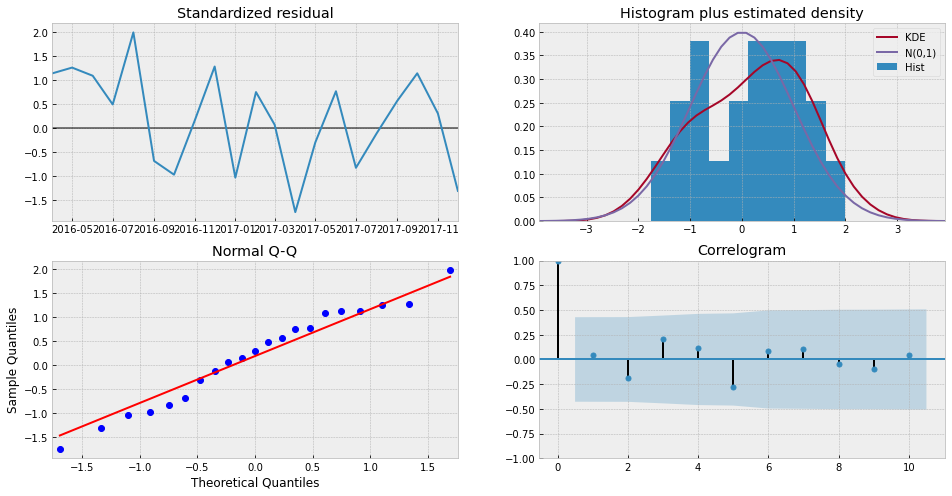

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0770      0.259     -0.297      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.024      0.981      -0.057       0.056
sigma2      6323.8087   6.86e-05   9.22e+07      0.000    6323.809    6323.809


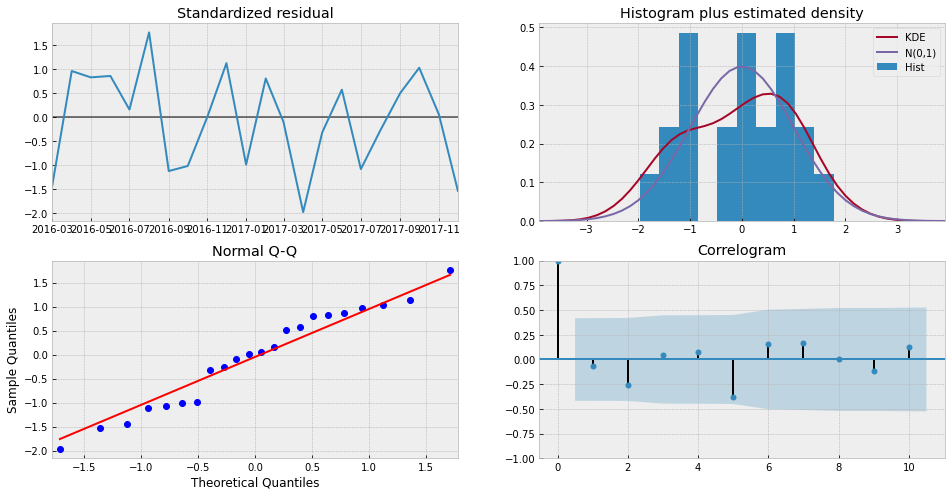

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.  
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.  
The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.  
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.  

Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

**Validating forecasts**

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

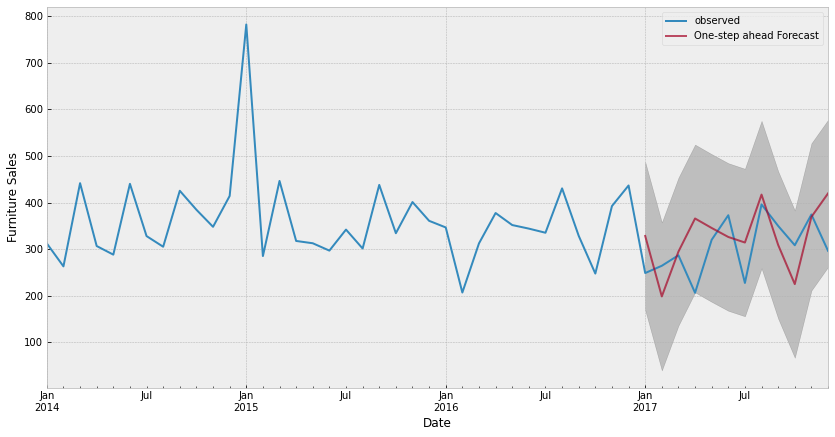

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5911.2


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 76.88


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

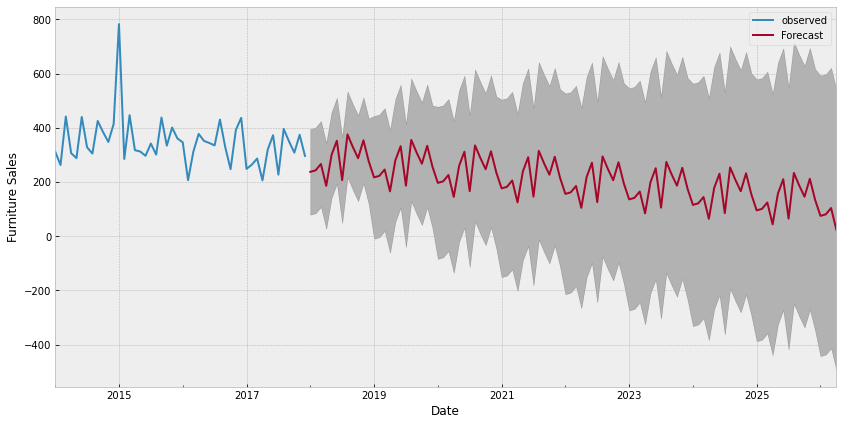

In [ ]:
## Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other over time. Therefore, we are going to compare time series of furniture and office supplier.

## Time Series comparison 

In [ ]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64

In [ ]:
office = df.loc[df['Category'] == 'Office Supplies']
furniture = df.loc[df['Category'] == 'Furniture']
technology = df.loc[df['Category'] == 'Technology']

According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

In [ ]:
office = office[['Order_Date', 'Sales']]
office = office.sort_values('Order_Date')
office = office.groupby('Order_Date')['Sales'].sum().reset_index()

In [ ]:
office.head()

,Order_Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [ ]:
furniture = furniture[['Order_Date', 'Sales']]
furniture = furniture.sort_values('Order_Date')
furniture = furniture.groupby('Order_Date')['Sales'].sum().reset_index()
furniture.head()

,Order_Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [ ]:
technology = technology[['Order_Date', 'Sales']]
technology = technology.sort_values('Order_Date')
technology = technology.groupby('Order_Date')['Sales'].sum().reset_index()
technology.head()

,Order_Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


In [ ]:
office = office.set_index('Order_Date')
furniture = furniture.set_index('Order_Date')
technology = technology.set_index('Order_Date')

y_office = office['Sales'].resample('MS').mean()
y_furniture = furniture['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()

In [ ]:
office = pd.DataFrame({'Order_Date': y_office.index, 'Sales': y_office.values})
furniture = pd.DataFrame({'Order_Date':y_furniture.index, 'Sales':y_furniture.values})
technology = pd.DataFrame({'Order_Date':y_technology.index, 'Sales':y_technology.values})

store = office.merge(furniture, how='inner', on='Order_Date')
store = store.merge(technology, how='inner', on='Order_Date')
store.head()

,Order_Date,Sales_x,Sales_y,Sales
0,2014-01-01,285.357647,480.194231,449.041429
1,2014-02-01,63.042588,367.931600,229.787143
2,2014-03-01,391.176318,857.291529,2031.948375
3,2014-04-01,464.794750,547.390357,613.028933
4,2014-05-01,324.346545,432.049188,564.698588


In [ ]:
store.rename(columns={'Sales_x': 'office_sales', 'Sales_y': 'furniture_sales', 'Sales': 'technology_sales'}, inplace=True)
store.head()

,Order_Date,office_sales,furniture_sales,technology_sales
0,2014-01-01,285.357647,480.194231,449.041429
1,2014-02-01,63.042588,367.931600,229.787143
2,2014-03-01,391.176318,857.291529,2031.948375
3,2014-04-01,464.794750,547.390357,613.028933
4,2014-05-01,324.346545,432.049188,564.698588


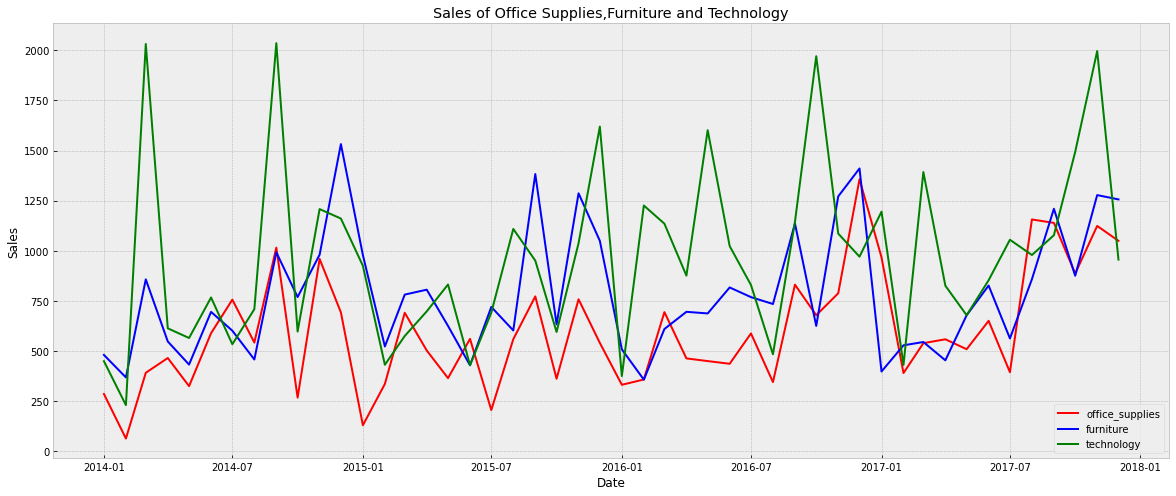

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order_Date'], store['office_sales'], 'r-', label = 'office_supplies')
plt.plot(store['Order_Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order_Date'], store['technology_sales'], 'g-', label = 'technology')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Office Supplies,Furniture and Technology')
plt.legend();

We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occationaly, office supplies passed furnitue on average daily sales. Let's find out when was the first time office supplies' sales surpassed those of furniture's.

In [ ]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order_Date']

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


## 5: Time Series Modeling with Prophet 

Prophet released by Facebook in 2017 is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. 

In [ ]:
office = office.rename(columns={'Order_Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
office_model.fit(office)

furniture = furniture.rename(columns={'Order_Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
furniture_model.fit(furniture)

technology = technology.rename(columns={'Order_Date': 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
technology_model.fit(technology)

In [ ]:
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

technology_forecast = technology_model.make_future_dataframe(periods=36, freq='MS')
technology_forecast = technology_model.predict(technology_forecast)


<Figure size 1296x432 with 0 Axes>

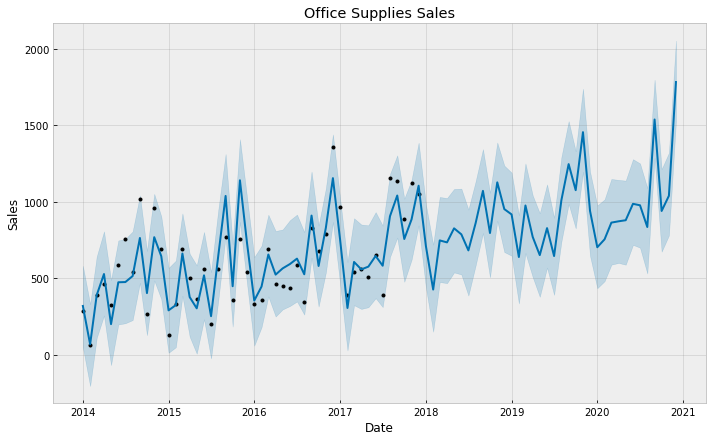

In [ ]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

<Figure size 1296x432 with 0 Axes>

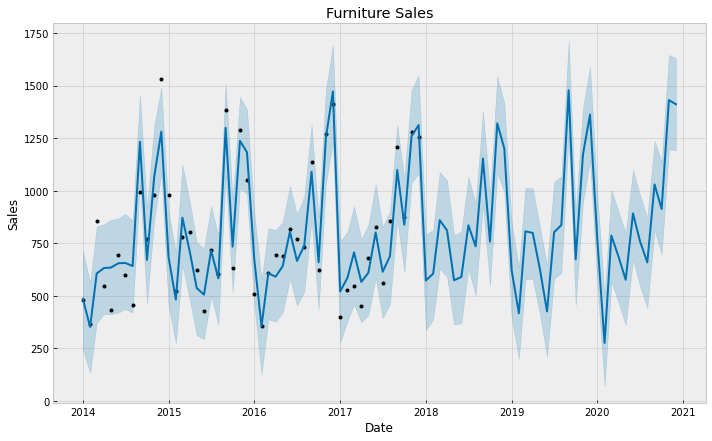

In [ ]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

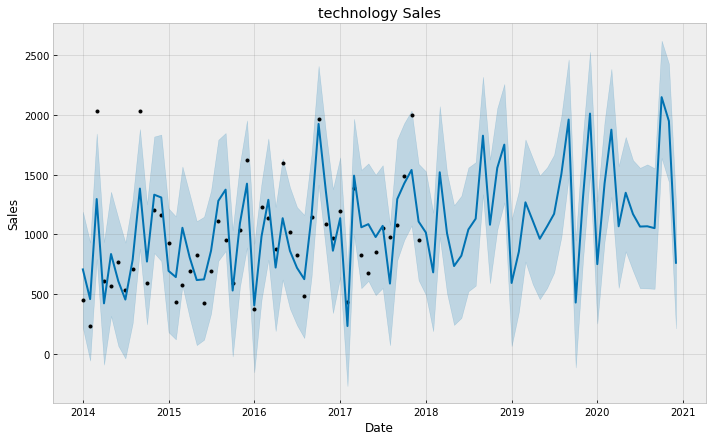

In [ ]:
plt.figure(figsize=(18, 6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('technology Sales');

**Compare Forecasts**

We already have the forecasts for three years for these three categories into the future. We will now join them together to compare their future forecasts.

In [ ]:
office_names = ['office_%s' % column for column in office_forecast.columns]
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
technology_names = ['technology_%s' % column for column in technology_forecast.columns]

merge_office_forecast = office_forecast.copy()
merge_furniture_forecast = furniture_forecast.copy()
merge_technology_forecast = technology_forecast.copy()

merge_office_forecast.columns = office_names
merge_furniture_forecast.columns = furniture_names
merge_technology_forecast.columns = technology_names

forecast = pd.merge(merge_office_forecast, merge_furniture_forecast, how = 'inner', left_on = 'office_ds', right_on = 'furniture_ds')
forecast.head()

,office_ds,office_trend,office_yhat_lower,office_yhat_upper,office_trend_lower,office_trend_upper,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_daily,office_daily_lower,office_daily_upper,office_weekly,office_weekly_lower,office_weekly_upper,...,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_daily,furniture_daily_lower,furniture_daily_upper,furniture_weekly,furniture_weekly_lower,furniture_weekly_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yhat
0,2014-01-01,27.194110,49.669228,582.306153,27.194110,27.194110,292.665292,292.665292,292.665292,434.038182,434.038182,434.038182,-39.237632,-39.237632,-39.237632,...,442.607981,442.607981,692.246505,692.246505,692.246505,-3.684230,-3.684230,-3.684230,-245.954294,-245.954294,-245.954294,0.0,0.0,0.0,485.873390
1,2014-02-01,34.878705,-203.441859,331.621861,34.878705,34.878705,34.307950,34.307950,34.307950,434.038182,434.038182,434.038182,-68.646180,-68.646180,-68.646180,...,307.399049,307.399049,692.246505,692.246505,692.246505,-112.798100,-112.798100,-112.798100,-272.049357,-272.049357,-272.049357,0.0,0.0,0.0,351.901436
2,2014-03-01,41.819631,111.506422,642.785730,41.819631,41.819631,348.623142,348.623142,348.623142,434.038182,434.038182,434.038182,-68.646180,-68.646180,-68.646180,...,560.786466,560.786466,692.246505,692.246505,692.246505,-112.798100,-112.798100,-112.798100,-18.661940,-18.661940,-18.661940,0.0,0.0,0.0,606.406123
3,2014-04-01,49.504227,257.708602,807.250217,49.504227,49.504227,479.185080,479.185080,479.185080,434.038182,434.038182,434.038182,186.959778,186.959778,186.959778,...,585.234973,585.234973,692.246505,692.246505,692.246505,-36.569548,-36.569548,-36.569548,-70.441984,-70.441984,-70.441984,0.0,0.0,0.0,632.091609
4,2014-05-01,56.940932,-66.547430,488.955524,56.940932,56.940932,143.946804,143.946804,143.946804,434.038182,434.038182,434.038182,-75.063755,-75.063755,-75.063755,...,586.525523,586.525523,692.246505,692.246505,692.246505,82.498092,82.498092,82.498092,-188.219074,-188.219074,-188.219074,0.0,0.0,0.0,634.579234


In [ ]:
merge_technology_forecast.head()

,technology_ds,technology_trend,technology_yhat_lower,technology_yhat_upper,technology_trend_lower,technology_trend_upper,technology_additive_terms,technology_additive_terms_lower,technology_additive_terms_upper,technology_daily,technology_daily_lower,technology_daily_upper,technology_weekly,technology_weekly_lower,technology_weekly_upper,technology_yearly,technology_yearly_lower,technology_yearly_upper,technology_multiplicative_terms,technology_multiplicative_terms_lower,technology_multiplicative_terms_upper,technology_yhat
0,2014-01-01,79.605139,217.098274,1190.400233,79.605139,79.605139,627.548611,627.548611,627.548611,895.444491,895.444491,895.444491,2.058659,2.058659,2.058659,-269.954538,-269.954538,-269.954538,0.0,0.0,0.0,707.153751
1,2014-02-01,85.728677,-56.414974,932.539621,85.728677,85.728677,372.510532,372.510532,372.510532,895.444491,895.444491,895.444491,176.189027,176.189027,176.189027,-699.122986,-699.122986,-699.122986,0.0,0.0,0.0,458.239209
2,2014-03-01,91.259614,793.182076,1844.926799,91.259614,91.259614,1205.286618,1205.286618,1205.286618,895.444491,895.444491,895.444491,176.189027,176.189027,176.189027,133.653101,133.653101,133.653101,0.0,0.0,0.0,1296.546233
3,2014-04-01,97.383152,-90.498350,937.254944,97.383152,97.383152,325.620236,325.620236,325.620236,895.444491,895.444491,895.444491,-277.666566,-277.666566,-277.666566,-292.157689,-292.157689,-292.157689,0.0,0.0,0.0,423.003387
4,2014-05-01,103.309156,317.595272,1357.329483,103.309156,103.309156,732.912792,732.912792,732.912792,895.444491,895.444491,895.444491,111.754033,111.754033,111.754033,-274.285732,-274.285732,-274.285732,0.0,0.0,0.0,836.221947


In [ ]:
forecast = forecast.merge(merge_technology_forecast, how = 'inner', left_on = 'office_ds', right_on = 'technology_ds')
forecast.head()

,office_ds,office_trend,office_yhat_lower,office_yhat_upper,office_trend_lower,office_trend_upper,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_daily,office_daily_lower,office_daily_upper,office_weekly,office_weekly_lower,office_weekly_upper,...,technology_additive_terms_lower,technology_additive_terms_upper,technology_daily,technology_daily_lower,technology_daily_upper,technology_weekly,technology_weekly_lower,technology_weekly_upper,technology_yearly,technology_yearly_lower,technology_yearly_upper,technology_multiplicative_terms,technology_multiplicative_terms_lower,technology_multiplicative_terms_upper,technology_yhat
0,2014-01-01,27.194110,49.669228,582.306153,27.194110,27.194110,292.665292,292.665292,292.665292,434.038182,434.038182,434.038182,-39.237632,-39.237632,-39.237632,...,627.548611,627.548611,895.444491,895.444491,895.444491,2.058659,2.058659,2.058659,-269.954538,-269.954538,-269.954538,0.0,0.0,0.0,707.153751
1,2014-02-01,34.878705,-203.441859,331.621861,34.878705,34.878705,34.307950,34.307950,34.307950,434.038182,434.038182,434.038182,-68.646180,-68.646180,-68.646180,...,372.510532,372.510532,895.444491,895.444491,895.444491,176.189027,176.189027,176.189027,-699.122986,-699.122986,-699.122986,0.0,0.0,0.0,458.239209
2,2014-03-01,41.819631,111.506422,642.785730,41.819631,41.819631,348.623142,348.623142,348.623142,434.038182,434.038182,434.038182,-68.646180,-68.646180,-68.646180,...,1205.286618,1205.286618,895.444491,895.444491,895.444491,176.189027,176.189027,176.189027,133.653101,133.653101,133.653101,0.0,0.0,0.0,1296.546233
3,2014-04-01,49.504227,257.708602,807.250217,49.504227,49.504227,479.185080,479.185080,479.185080,434.038182,434.038182,434.038182,186.959778,186.959778,186.959778,...,325.620236,325.620236,895.444491,895.444491,895.444491,-277.666566,-277.666566,-277.666566,-292.157689,-292.157689,-292.157689,0.0,0.0,0.0,423.003387
4,2014-05-01,56.940932,-66.547430,488.955524,56.940932,56.940932,143.946804,143.946804,143.946804,434.038182,434.038182,434.038182,-75.063755,-75.063755,-75.063755,...,732.912792,732.912792,895.444491,895.444491,895.444491,111.754033,111.754033,111.754033,-274.285732,-274.285732,-274.285732,0.0,0.0,0.0,836.221947


In [ ]:
forecast = forecast.rename(columns={'office_ds': 'Date'}).drop(['furniture_ds', 'technology_ds'], axis=1)
forecast.head()

,Date,office_trend,office_yhat_lower,office_yhat_upper,office_trend_lower,office_trend_upper,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_daily,office_daily_lower,office_daily_upper,office_weekly,office_weekly_lower,office_weekly_upper,...,technology_additive_terms_lower,technology_additive_terms_upper,technology_daily,technology_daily_lower,technology_daily_upper,technology_weekly,technology_weekly_lower,technology_weekly_upper,technology_yearly,technology_yearly_lower,technology_yearly_upper,technology_multiplicative_terms,technology_multiplicative_terms_lower,technology_multiplicative_terms_upper,technology_yhat
0,2014-01-01,27.194110,49.669228,582.306153,27.194110,27.194110,292.665292,292.665292,292.665292,434.038182,434.038182,434.038182,-39.237632,-39.237632,-39.237632,...,627.548611,627.548611,895.444491,895.444491,895.444491,2.058659,2.058659,2.058659,-269.954538,-269.954538,-269.954538,0.0,0.0,0.0,707.153751
1,2014-02-01,34.878705,-203.441859,331.621861,34.878705,34.878705,34.307950,34.307950,34.307950,434.038182,434.038182,434.038182,-68.646180,-68.646180,-68.646180,...,372.510532,372.510532,895.444491,895.444491,895.444491,176.189027,176.189027,176.189027,-699.122986,-699.122986,-699.122986,0.0,0.0,0.0,458.239209
2,2014-03-01,41.819631,111.506422,642.785730,41.819631,41.819631,348.623142,348.623142,348.623142,434.038182,434.038182,434.038182,-68.646180,-68.646180,-68.646180,...,1205.286618,1205.286618,895.444491,895.444491,895.444491,176.189027,176.189027,176.189027,133.653101,133.653101,133.653101,0.0,0.0,0.0,1296.546233
3,2014-04-01,49.504227,257.708602,807.250217,49.504227,49.504227,479.185080,479.185080,479.185080,434.038182,434.038182,434.038182,186.959778,186.959778,186.959778,...,325.620236,325.620236,895.444491,895.444491,895.444491,-277.666566,-277.666566,-277.666566,-292.157689,-292.157689,-292.157689,0.0,0.0,0.0,423.003387
4,2014-05-01,56.940932,-66.547430,488.955524,56.940932,56.940932,143.946804,143.946804,143.946804,434.038182,434.038182,434.038182,-75.063755,-75.063755,-75.063755,...,732.912792,732.912792,895.444491,895.444491,895.444491,111.754033,111.754033,111.754033,-274.285732,-274.285732,-274.285732,0.0,0.0,0.0,836.221947


**Visualizing the trend and the forecast**

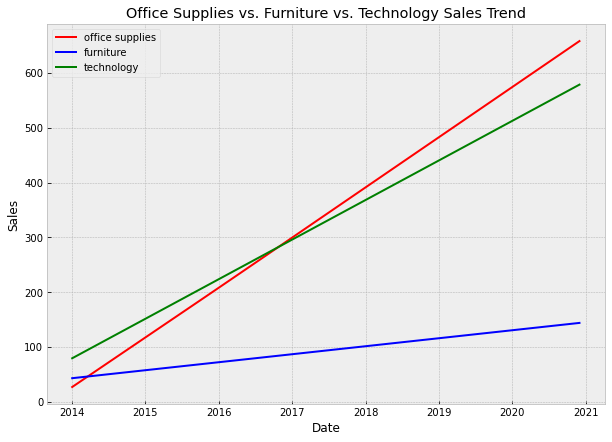

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['office_trend'], 'r-', label='office supplies')
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-', label='furniture')
plt.plot(forecast['Date'], forecast['technology_trend'], 'g-', label='technology')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Office Supplies vs. Furniture vs. Technology Sales Trend');

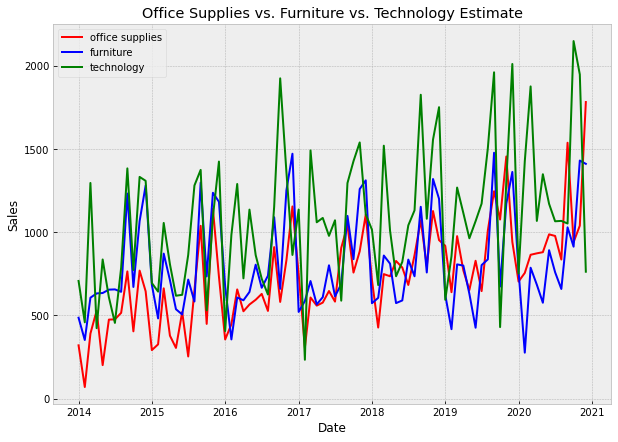

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-', label='office supplies')
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-', label='furniture')
plt.plot(forecast['Date'], forecast['technology_yhat'], 'g-', label='technology')
plt.legend() 
plt.xlabel('Date') 
plt.ylabel('Sales')
plt.title('Office Supplies vs. Furniture vs. Technology Estimate');

**Trends and Patterns**
Now, we can use the Prophet Models to inspect different trends of these three categories in the data.

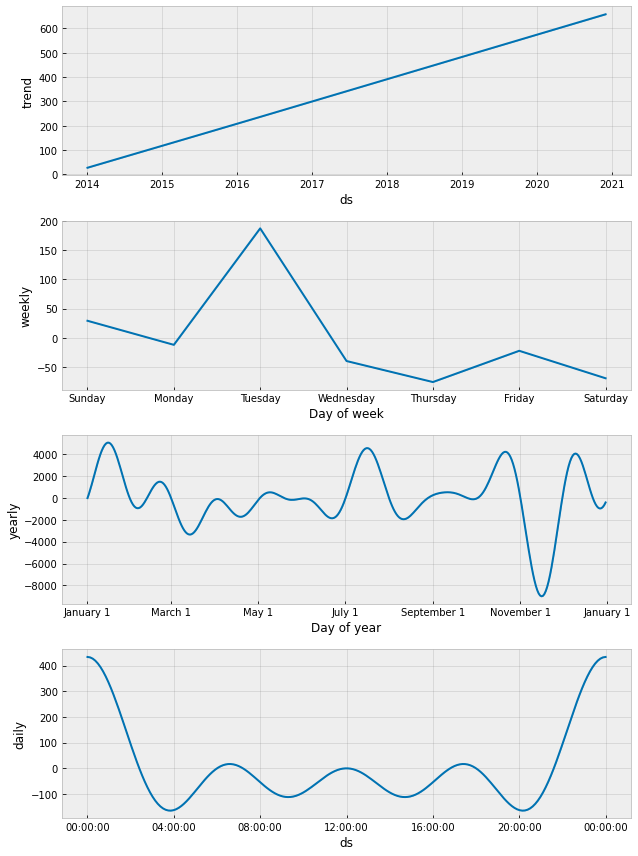

In [ ]:
office_model.plot_components(office_forecast);

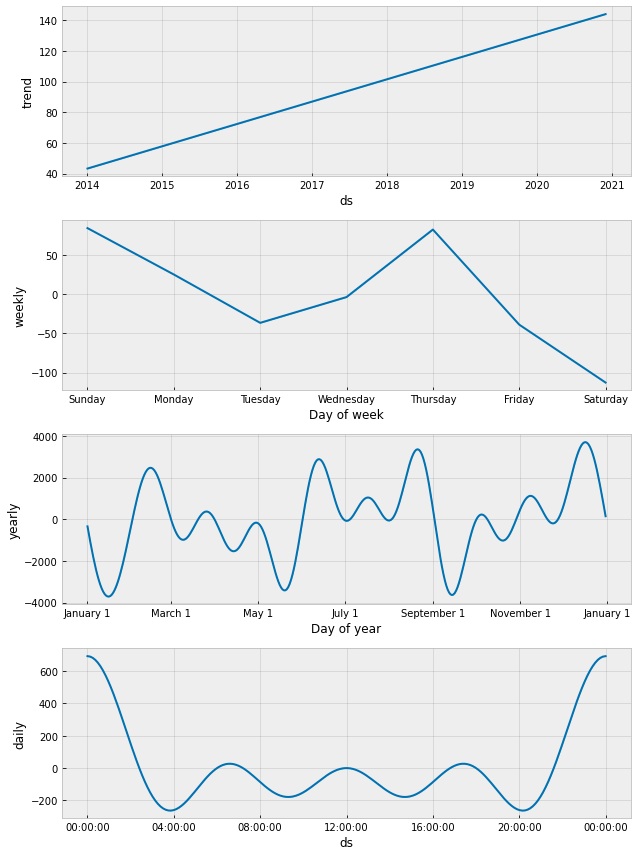

In [ ]:
furniture_model.plot_components(furniture_forecast);

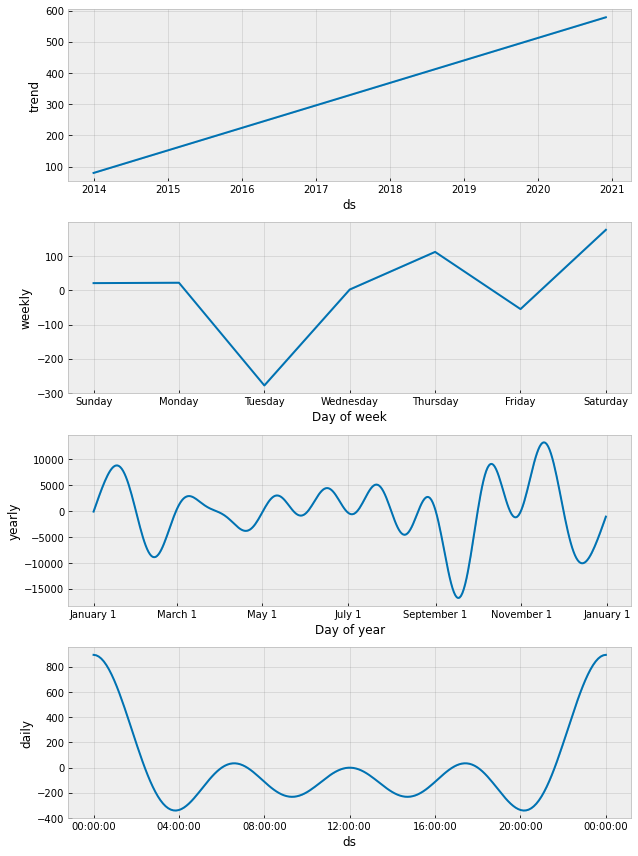

In [ ]:
technology_model.plot_components(technology_forecast);

It is good that the sales among office supplies, furniture and technology have been linearly increasing over time although office supplies' growth seems slightly stronger. The worst month is November for office supplies, April for furniture, September for technology. The best month is January for office supplies, December for furniture, October for technology. 